In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ShapTimeRNN
from ShapTimeRNN import supertime, ShapleyValues, TimeImportance, TimeHeatmap, trans, supertime_add

In [3]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Energy_data.csv')
data.head()

,Timestamp,Value,Year,Month,Day,Hour,Minute,timing,week_info,Holiday,lag_tem,lag_value
0,2017-07-25 03:15:00,0.052632,0.0,0.0,0.827586,0.130435,0.333333,0.000000,0.0,0.0,0.322447,0.105263
1,2017-07-25 03:30:00,0.157895,0.0,0.0,0.827586,0.130435,0.666667,0.000000,0.0,0.0,0.300475,0.052632
2,2017-07-25 03:45:00,0.105263,0.0,0.0,0.827586,0.130435,1.000000,0.000000,0.0,0.0,0.278504,0.105263
3,2017-07-25 04:00:00,0.157895,0.0,0.0,0.827586,0.173913,0.000000,0.333333,0.0,0.0,0.256532,0.052632
4,2017-07-25 04:15:00,0.105263,0.0,0.0,0.827586,0.173913,0.333333,0.333333,0.0,0.0,0.255938,0.105263


In [4]:
train = data[:-300]
test = data[-300:]
print(train.shape)
print(test.shape)

(2104, 12)
(300, 12)


In [5]:
x_train = train.drop(columns = {'Timestamp','Value'}, axis = 1)
y_train = train.loc[:, ['Value']]

x_test = test.drop(columns = {'Timestamp','Value'}, axis = 1)
y_test = test.loc[:, ['Value']]

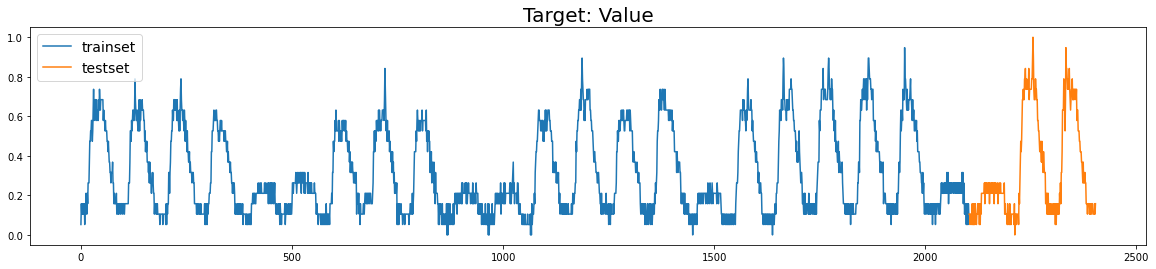

In [6]:
sns.reset_orig()
plt.figure(figsize = (20,4))
plt.title('Target: Value', fontsize = 20)
plt.plot(y_train['Value'], label = 'trainset')
plt.plot(y_test['Value'], label = 'testset')

plt.legend(fontsize = 14)
plt.show()

In [7]:
x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

# RNN

In [8]:
model_rnn = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=True,activation='relu'),
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_rnn.compile(loss='mse', optimizer='adam') 
    
history = model_rnn.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 2ms/step - loss: 0.0583
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 13/100
17/17 [=================

In [9]:
prediction_rnn = model_rnn.predict(x_test_sca)

10/10 [==============================] - 0s 776us/step


In [10]:
r2 = r2_score(prediction_rnn, y_test)
mse = mean_squared_error(prediction_rnn, y_test)
print(r2)
print(mse)

0.6574887755946385
0.012831229425228656


In [20]:
model_rnn.save('model_rnn.h5')

In [11]:
Tn= 9
interp_x= x_train_sca
model = model_rnn

ShapTime_rnn = ShapleyValues(model, interp_x, Tn)

22/22 [==============================] - 0s 749us/step


30/30 [==============================] - 0s 628us/step


51/51 [==============================] - 0s 618us/step


66/66 [==============================] - 0s 614us/step


In [12]:
ShapTime_rnn

[array([0.02141274], dtype=float32),
 array([-0.01489696], dtype=float32),
 array([-0.01737099], dtype=float32),
 array([-0.00639415], dtype=float32),
 array([-0.02694737], dtype=float32),
 array([0.03248879], dtype=float32),
 array([-0.02210442], dtype=float32),
 array([0.03456498], dtype=float32),
 array([-0.00016736], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

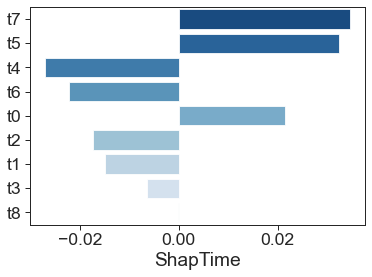

In [14]:
TimeImportance(Tn, trans(ShapTime_rnn), time_columns)

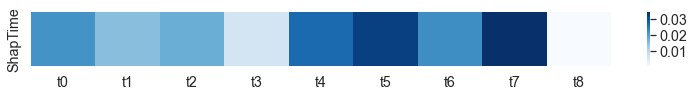

In [15]:
TimeHeatmap(Tn, trans(ShapTime_rnn), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        SimpleRNN(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=True,activation='relu'),
        Dropout(0.1), 
        SimpleRNN(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 2ms/step - loss: 0.0388
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 13/100
17/17 [=================

In [19]:
pred_check = model_check.predict(x_test_sca)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 0s 887us/step
0.7572391937472682 Degree of Improvement: 15.17%
0.01162063947654311 Degree of Improvement: 9.43%


In [21]:
model_check.save('model_(rnn).h5')

# Bi-RNN

In [34]:
model_birnn = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_birnn.compile(loss='mse', optimizer='adam') 
    
history = model_birnn.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 4ms/step - loss: 0.0494
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 13/100
17/17 [=================

In [35]:
prediction_birnn = model_birnn.predict(x_test_sca)

10/10 [==============================] - 0s 2ms/step


In [36]:
prediction_birnn = prediction_birnn.reshape(300, 1)

In [37]:
r2 = r2_score(prediction_birnn, y_test)
mse = mean_squared_error(prediction_birnn, y_test)
print(r2)
print(mse)

0.6804714974360357
0.011993707727122091


In [48]:
model_birnn.save('model_birnn.h5')

In [39]:
Tn= 9
interp_x= x_train_sca
model = model_birnn

ShapTime_birnn = ShapleyValues(model, interp_x, Tn)

30/30 [==============================] - 0s 1ms/step


37/37 [==============================] - 0s 1ms/step


44/44 [==============================] - 0s 1ms/step


66/66 [==============================] - 0s 1ms/step


In [40]:
ShapTime_birnn

[array([[0.01856963]], dtype=float32),
 array([[-0.01714324]], dtype=float32),
 array([[-0.01658118]], dtype=float32),
 array([[-0.00712086]], dtype=float32),
 array([[-0.02642067]], dtype=float32),
 array([[0.03234199]], dtype=float32),
 array([[-0.01943876]], dtype=float32),
 array([[0.0358341]], dtype=float32),
 array([[0.00058041]], dtype=float32)]

In [41]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

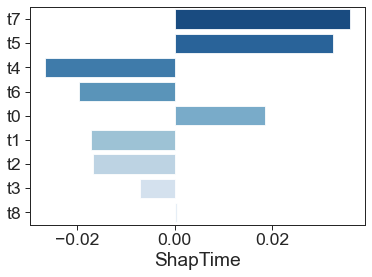

In [42]:
TimeImportance(Tn, trans(ShapTime_birnn), time_columns)

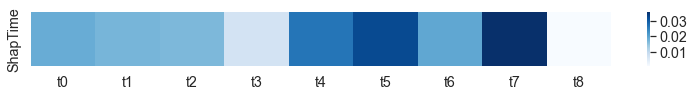

In [43]:
TimeHeatmap(Tn, trans(ShapTime_birnn), time_columns)

In [44]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [45]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [46]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(SimpleRNN(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 5ms/step - loss: 0.0321
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0160
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 13/100
17/17 [=================

In [47]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(300, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 0s 2ms/step
0.7425344268700005 Degree of Improvement: 9.12%
0.010108599899614238 Degree of Improvement: 15.72%


In [49]:
model_check.save('model_(birnn).h5')

# LSTM

In [8]:
model_lstm = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])
 
model_lstm.compile(loss='mse', optimizer='adam') 
    
history = model_lstm.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 3ms/step - loss: 0.1013
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 12/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 13/100
17/17 [=================

In [9]:
prediction_lstm = model_lstm.predict(x_test_sca)

10/10 [==============================] - 0s 887us/step


In [10]:
r2 = r2_score(prediction_lstm, y_test)
mse = mean_squared_error(prediction_lstm, y_test)
print(r2)
print(mse)

0.6249603857804762
0.01536430016466479


In [20]:
model_lstm.save('model_lstm.h5')

In [11]:
Tn= 9
interp_x= x_train_sca
model = model_lstm

ShapTime_lstm = ShapleyValues(model, interp_x, Tn)

22/22 [==============================] - 0s 743us/step


30/30 [==============================] - 0s 722us/step


51/51 [==============================] - 0s 678us/step


66/66 [==============================] - 0s 690us/step


In [12]:
ShapTime_lstm

[array([0.02358648], dtype=float32),
 array([-0.01406705], dtype=float32),
 array([-0.020951], dtype=float32),
 array([-0.00617482], dtype=float32),
 array([-0.03137236], dtype=float32),
 array([0.03450799], dtype=float32),
 array([-0.02877828], dtype=float32),
 array([0.03983411], dtype=float32),
 array([0.00401944], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

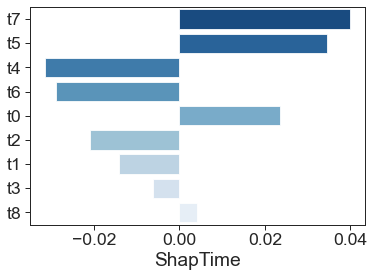

In [14]:
TimeImportance(Tn, trans(ShapTime_lstm), time_columns)

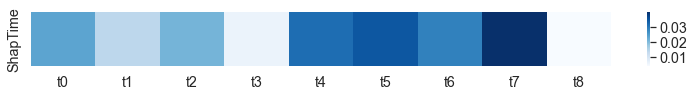

In [15]:
TimeHeatmap(Tn, trans(ShapTime_lstm), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        LSTM(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        LSTM(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 3ms/step - loss: 0.1060
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0456
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 12/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 13/100
17/17 [=================

In [19]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(300, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 0s 997us/step
0.641262315821339 Degree of Improvement: 2.61%
0.014194193297009168 Degree of Improvement: 7.62%


In [21]:
model_check.save('model_(lstm).h5')

# Bi-LSTM

In [20]:
model_bilstm = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bilstm.compile(loss='mse', optimizer='adam') 
    
history = model_bilstm.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 4ms/step - loss: 0.0999
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 13/100
17/17 [=================

In [21]:
prediction_bilstm = model_bilstm.predict(x_test_sca)
prediction_bilstm = prediction_bilstm.reshape(300, 1)

10/10 [==============================] - 0s 1ms/step


In [22]:
r2 = r2_score(prediction_bilstm, y_test)
mse = mean_squared_error(prediction_bilstm, y_test)
print(r2)
print(mse)

0.7121946213216657
0.011930775744883422


In [32]:
model_bilstm.save('model_bilstm.h5')

In [23]:
Tn= 9
interp_x= x_train_sca
model = model_bilstm

ShapTime_bilstm = ShapleyValues(model, interp_x, Tn)

30/30 [==============================] - 0s 1ms/step


37/37 [==============================] - 0s 968us/step


37/37 [==============================] - 0s 1ms/step


66/66 [==============================] - 0s 1ms/step


In [24]:
ShapTime_bilstm

[array([[0.02493772]], dtype=float32),
 array([[-0.01367808]], dtype=float32),
 array([[-0.02152941]], dtype=float32),
 array([[-0.00666407]], dtype=float32),
 array([[-0.02910122]], dtype=float32),
 array([[0.03141908]], dtype=float32),
 array([[-0.02283186]], dtype=float32),
 array([[0.03643725]], dtype=float32),
 array([[0.0016188]], dtype=float32)]

In [25]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

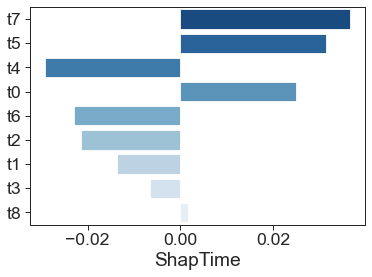

In [26]:
TimeImportance(Tn, trans(ShapTime_bilstm), time_columns)

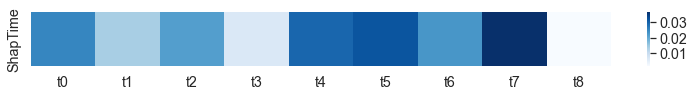

In [27]:
TimeHeatmap(Tn, trans(ShapTime_bilstm), time_columns)

In [28]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [29]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [30]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(LSTM(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 4s 6ms/step - loss: 0.0984
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0423
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0308
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 13/100
17/17 [=================

In [31]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(300, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 0s 1ms/step
0.7604744414310967 Degree of Improvement: 6.78%
0.010025789717570132 Degree of Improvement: 15.97%


In [33]:
model_check.save('model_(bilstm).h5')

# GRU

In [8]:
model_gru = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_gru.compile(loss='mse', optimizer='adam') 
    
history = model_gru.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 4ms/step - loss: 0.0763
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0374
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0247
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 13/100
17/17 [=================

In [9]:
prediction_gru = model_gru.predict(x_test_sca)

10/10 [==============================] - 1s 997us/step


In [10]:
r2 = r2_score(prediction_gru, y_test)
mse = mean_squared_error(prediction_gru, y_test)
print(r2)
print(mse)

0.7130376741750596
0.011946500156154222


In [19]:
model_gru.save('model_gru.h5')

In [11]:
Tn= 9
interp_x= x_train_sca
model = model_gru

ShapTime_gru = ShapleyValues(model, interp_x, Tn)

22/22 [==============================] - 0s 911us/step


30/30 [==============================] - 0s 817us/step


51/51 [==============================] - 0s 847us/step


66/66 [==============================] - 0s 866us/step


In [12]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

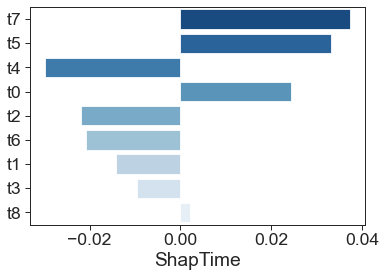

In [13]:
TimeImportance(Tn, trans(ShapTime_gru), time_columns)

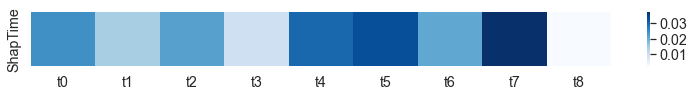

In [14]:
TimeHeatmap(Tn, trans(ShapTime_gru), time_columns)

In [15]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [16]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [17]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100, return_sequences=True,activation='relu'), 
        Dropout(0.1), 
        GRU(100,return_sequences=False),
        Dropout(0.2), 
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 4ms/step - loss: 0.0759
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0265
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0097
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 13/100
17/17 [=================

In [18]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(300, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 0s 1ms/step
0.7376863472622734 Degree of Improvement: 3.46%
0.010171763425695462 Degree of Improvement: 14.86%


In [20]:
model_check.save('model_(gru).h5')

# Bi-GRU

In [8]:
model_bigru = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_bigru.compile(loss='mse', optimizer='adam') 
    
history = model_bigru.fit(x_train_sca, y_train, batch_size=256, epochs=50)

Epoch 1/50
9/9 [==============================] - 6s 8ms/step - loss: 0.0953
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0444
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0319
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0115
Epoch 8/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 9/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 11/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 12/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 13/50
9/9 [==============================] - 0s 7ms/step - loss: 0.

In [9]:
prediction_bigru = model_bigru.predict(x_test_sca)
prediction_bigru = prediction_bigru.reshape(300, 1)

10/10 [==============================] - 1s 1ms/step


In [10]:
r2 = r2_score(prediction_bigru, y_test)
mse = mean_squared_error(prediction_bigru, y_test)
print(r2)
print(mse)

0.5927055899164022
0.015453250670791452


In [21]:
model_bigru.save('model_bigru.h5')

In [11]:
Tn= 9
interp_x= x_train_sca
model = model_bigru

ShapTime_bigru = ShapleyValues(model, interp_x, Tn)

30/30 [==============================] - 0s 1ms/step


37/37 [==============================] - 0s 1ms/step


44/44 [==============================] - 0s 1ms/step


66/66 [==============================] - 0s 1ms/step


In [12]:
ShapTime_bigru

[array([[0.02305598]], dtype=float32),
 array([[-0.01362523]], dtype=float32),
 array([[-0.02040093]], dtype=float32),
 array([[-0.00502313]], dtype=float32),
 array([[-0.03069869]], dtype=float32),
 array([[0.03035573]], dtype=float32),
 array([[-0.02303783]], dtype=float32),
 array([[0.03678099]], dtype=float32),
 array([[0.00319214]], dtype=float32)]

In [13]:
time_columns =  ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']

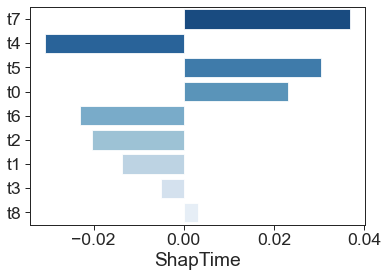

In [14]:
TimeImportance(Tn, trans(ShapTime_bigru), time_columns)

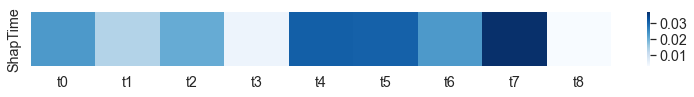

In [15]:
TimeHeatmap(Tn, trans(ShapTime_bigru), time_columns)

In [16]:
for k in range(Tn):
    exec(f't{k} = supertime_add(Tn, train)[k]')

In [17]:
check_replist = [t0, t1, t2, t3, t4, t5, t6, t7, t7]

In [18]:
#check
check = pd.concat(check_replist, axis = 0)
x_check = check.drop(columns = {'Timestamp','Value'}, axis = 1)
y_check = check.loc[:, ['Value']]
x_check_sca = x_check.values[:].reshape(x_check.shape[0], 1, x_check.shape[1])


model_check = tf.keras.Sequential([
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')), 
        Dropout(0.1),
        Bidirectional(GRU(100, return_sequences=True,activation='relu')),
        Dropout(0.2),
        Dense(1) ])

model_check.compile(loss='mse', optimizer='adam') 
    
history = model_check.fit(x_train_sca, y_train, batch_size=128, epochs=100)

Epoch 1/100
17/17 [==============================] - 6s 5ms/step - loss: 0.0708
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0315
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0083
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0077
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 13/100
17/17 [=================

In [19]:
pred_check = model_check.predict(x_test_sca)
pred_check = pred_check.reshape(300, 1)
r2_check = r2_score(pred_check, y_test)
mse_check = mean_squared_error(pred_check, y_test)

print(r2_check, 'Degree of Improvement: {:.2%}'.format((r2_check-r2)/abs(r2)))
print(mse_check, 'Degree of Improvement: {:.2%}'.format((mse-mse_check)/mse))

10/10 [==============================] - 1s 1ms/step
0.7092290985355971 Degree of Improvement: 19.66%
0.011267814174460572 Degree of Improvement: 27.08%


In [20]:
model_check.save('model_(bigru).h5')